## Content 

* [**About the Competition**](#1)
    * Objective
    * Questions?
    * About the kernel
* [**About the Data**](#2)
    * Importing the necessary Packages
    * Exploring the data
* [**Exploratory Data Analysis**](#3)
    * Data Quality
    * Cell Viability 
* [**Reference**](#10)   



# About the competition <a id="1"></a>

**Mechanisms of Action (MoA) Prediction:
Can you improve the algorithm that classifies drugs based on their biological activity?**

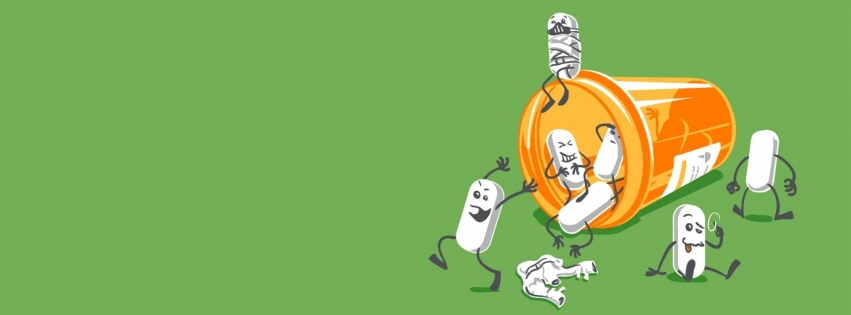

## Objective

The goal of the challenge is to help advancing development of drug through improvements to MoA prediction algorithms.

## Questions?

#### What is Mechanism of Action(MOA) of a drug?

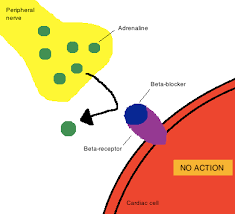

In medicine, a term used to describe how a drug or other substance produces an effect in the body. For example, a drug's mechanism of action could be how it affects a specific target in a cell, such as an enzyme, or a cell function, such as cell growth.

#### How do we determine the MoAs of a new drug?

One approach is to treat a sample of human cells with the drug and then analyze the cellular responses with algorithms that search for similarity to known patterns in large genomic databases, such as libraries of gene expression or cell viability patterns of drugs with known MoAs.

#### Since drugs can have multiple MoA annotations, the task is formally a multi-label classification problem.

## About the kernel

This kernel acts as a starter kit. It gives all the essential ideas to work on this competition.

**Key Takeaways**

* Extensive EDA
* Effective Story Telling
* Creative Feature Engineering
* Modelling

# About the data <a id="2"></a>

## Importing the necessary Packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs


from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## Data Exploration

##### Too many files little confusing right, let's try to understand the needs for these files

In [ ]:
sample = pd.read_csv("/kaggle/input/lish-moa/sample_submission.csv")
train_scored = pd.read_csv("/kaggle/input/lish-moa/train_targets_scored.csv")
train_nscored = pd.read_csv("/kaggle/input/lish-moa/train_targets_nonscored.csv")
train_features = pd.read_csv("/kaggle/input/lish-moa/train_features.csv")
test_features = pd.read_csv("/kaggle/input/lish-moa/test_features.csv")

**train_targets_scored.csv** - The binary MoA targets that are scored.

In [ ]:
train_scored.head()

**train_targets_nonscored.csv** - Additional (optional) binary MoA responses for the training data. These are not predicted nor scored.


In [ ]:
train_nscored.head()

**train_features.csv** - 

Features for the training set. 
*      **g**- signify gene expression data
*      **c**- signify cell viability data. 
*      **cp_type** indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle) control perturbations have no MoAs
*      **cp_time**  indicate treatment duration (24, 48, 72 hours)
*      **cp_dose** indicate treatment dose (high or low).

In [ ]:
train_features.head()

**test_features.csv** - Features for the test data. You must predict the probability of each scored MoA for each row in the test data.

In [ ]:
test_features.head()

**sample_submission.csv** - A submission file in the correct format.

In [ ]:
sample.head()

With the above exploration it's that the we are going to predict **train_scored** 206 columns as target variables, **Mutli label prediction**. 

You might ask then what is purpose of the dataset **train_nscored** dataset, which has 402 columns, it is mentioned that the attributes of the dataset is not been predicted/scored. So there is a possibility of having values to those 402 columns which might have some impact **MOA** so we will try to answer that question also in that dataset.

# Exploratory data Analysis <a id="3"></a>

## Data Quality

The quality of the data can be measured by factors such as, 

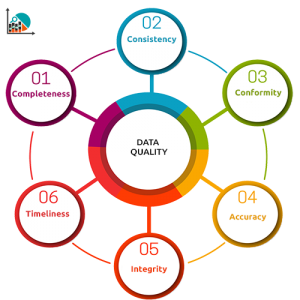

Since the data we are having now is provided by the **Connectivity Map**, a project within the Broad Institute of **MIT and Harvard**, together with the **Laboratory for Innovation Science** at Harvard (LISH), we'll just try to understand the missing values nature in the dataset.

In [ ]:
print("Train Features Missing Values:",sum(train_features.isnull().sum().tolist()))
print("Train Scored Misssng Values:",sum(train_scored.isnull().sum().tolist()))
print("Train Non-Scored Misisng Values:",sum(train_nscored.isnull().sum().tolist()))
print("Test Features Misisng Values:",sum(test_features.isnull().sum().tolist()))

#### From this, it is very clear that the data quality is good.

## Cell Viability

A measure of the number of cells that are **viable** (i.e. alive and capable of growth) in a given area or volume. Viable cell count can be determined by the total cell count minus the count of nonviable or dead cells. **One use of viable cell count is to estimate cytotoxicity**.

**Cell viability** is a measure of the proportion of live, healthy cells within a population.

**Cell viability assays** are used to determine the overall health of cells, optimize culture or experimental conditions, and to measure cell survival following treatment with compounds, such as during a drug screen.

There are total of 100 columns from range **c-0 to c-99** describing the cell viability. Let's try to understand nature of these columns.

### Average cell viability

In [ ]:
values = train_features[train_features.columns[train_features.columns.str.startswith('c-')]].mean().values
range_ = [i for i in range(0,100)]
Mean_df = pd.DataFrame()
Mean_df['range'] = range_
Mean_df['Values'] = values

fig = px.line(Mean_df, x="range", y="Values", title='Average Cell Viability over the columns')
fig.show()

The given data contains cell vailabilty values between the range **-10 to 15**. Of which we are seeing the avergae values of each columns of which most of them are between the range **-0.3 to -0.5**.

Since cell viability describe the cell proportion of live, healthy cells within a population.The averge falling below 0 describes the negative impact of drugs on the cells.

### Maximum cell viability

In [ ]:
values = train_features[train_features.columns[train_features.columns.str.startswith('c-')]].max().values
range_ = [i for i in range(0,100)]
Mean_df = pd.DataFrame()
Mean_df['range'] = range_
Mean_df['Values'] = values

fig = px.line(Mean_df, x="range", y="Values", title='Maximum Cell Viability over the columns')
fig.show()

The most of the maximum cell vaibility values lies between the range 2.5 to 4.5

### Minimum cell viability

In [ ]:
values = train_features[train_features.columns[train_features.columns.str.startswith('c-')]].min().values
range_ = [i for i in range(0,100)]
Mean_df = pd.DataFrame()
Mean_df['range'] = range_
Mean_df['Values'] = values

fig = px.line(Mean_df, x="range", y="Values", title='Minimum Cell Viability over the columns')
fig.show()

The minimum cell viability of the columns falls at -10 for most of the columns.

### Distribution of values

In [ ]:
sns.kdeplot(data=train_features['c-0'], label="Cell 1", shade=True)
sns.kdeplot(data=train_features['c-1'], label="Cell 2", shade=True)
sns.kdeplot(data=train_features['c-2'], label="Cell 3", shade=True)
sns.kdeplot(data=train_features['c-97'], label="Cell 98", shade=True)
sns.kdeplot(data=train_features['c-98'], label="Cell 99", shade=True)
sns.kdeplot(data=train_features['c-99'], label="Cell 100", shade=True)

# Add title
plt.title("Distribution of Viabilty of First and Last 3 cells")

From the graph, it is clear that the distribution range of vailbility  of the cells are almost equal.

### Correlation among the Cell Viability

In [ ]:
cells = train_features[train_features.columns[train_features.columns.str.startswith('c-')]]
#Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cells.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Correlation: Cell viability', fontsize=15, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

# Reference <a id="10"></a>

* [Drugs classification: Mechanisms of Action](https://www.kaggle.com/amiiiney/drugs-classification-mechanisms-of-action)
* [Explorations of Action - MoA EDA](https://www.kaggle.com/headsortails/explorations-of-action-moa-eda)

### This is just the initial work, stay tuned for more updates.

### If you like the notebook, please upvote it.